# Linear Regression
Slides: 23 - 30

In [278]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load dataset

In [279]:
mpg = pd.read_fwf("auto-mpg.data", header=None, names=['mpg', 'cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'model_year', 'origin', 'car_name'])

type(mpg)

pandas.core.frame.DataFrame

In [280]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


Drop the car names to make the data numeric only

In [281]:
mpg = mpg.drop('car_name', axis='columns')

mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2
395,32.0,4,135.0,84.00,2295.0,11.6,82,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1


The data contains null values so drop those rows using pandas `dropna()`

In [282]:
mpg = mpg.dropna()

mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2
395,32.0,4,135.0,84.00,2295.0,11.6,82,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1


Creating feature and target 

In [283]:
X = mpg.drop('mpg', axis='columns').values
y = mpg['mpg'].values

## Predicting mpg from a single feature

In [284]:
X

array([[8, 307.0, '130.0', ..., 12.0, 70, 1],
       [8, 350.0, '165.0', ..., 11.5, 70, 1],
       [8, 318.0, '150.0', ..., 11.0, 70, 1],
       ...,
       [4, 135.0, '84.00', ..., 11.6, 82, 1],
       [4, 120.0, '79.00', ..., 18.6, 82, 1],
       [4, 119.0, '82.00', ..., 19.4, 82, 1]], dtype=object)

### Use a list to iterate over all the different variables so we can plot them against mpg


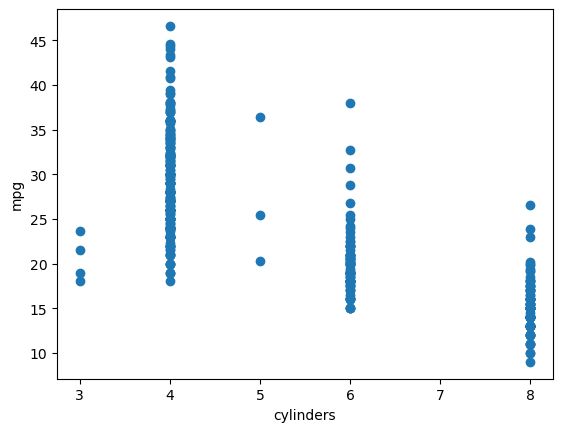

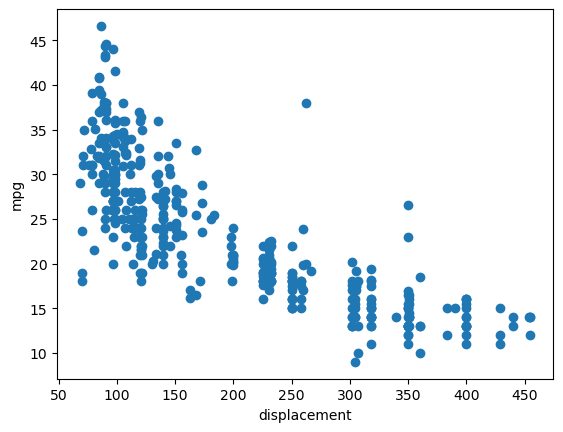

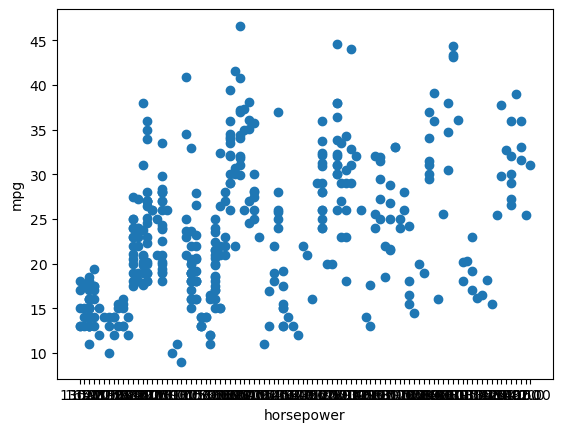

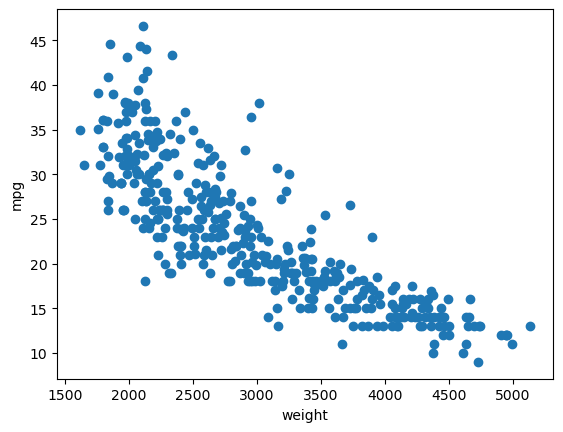

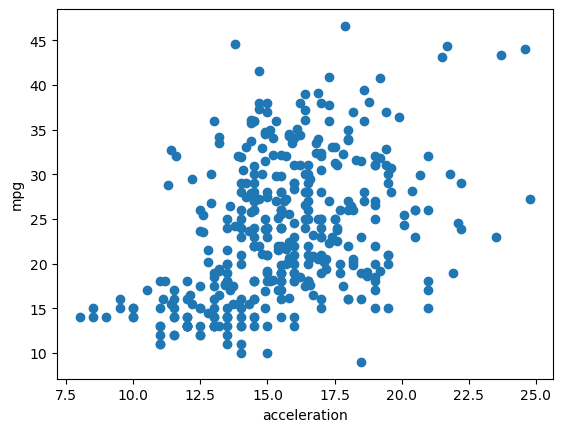

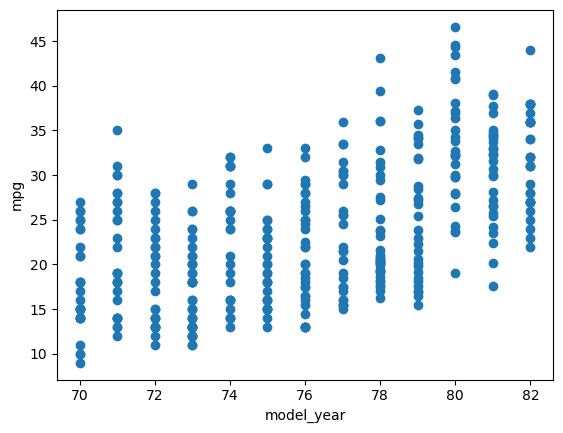

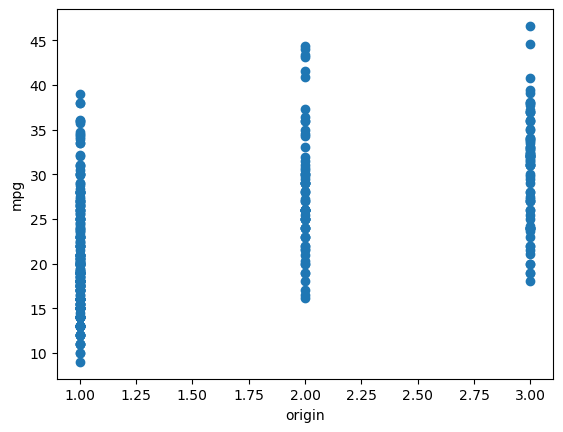

In [285]:
# get  column names from the mpg dataframe
column_names = list(mpg.columns)
# remove 'mpg' as it is on the y-axis
column_names.remove('mpg')

# transpose array 
transposed_X = X.T

# now iterate over the columns
# set dummy variable so we can access each of the column names in turn
i = 0

for column in transposed_X:
    plt.scatter(column, y)
    plt.ylabel('mpg')
    plt.xlabel(column_names[i])
    plt.show()
    i += 1
        

## all these graphs allow us to evaluate the data
we can bin variables that aren't contributing to mpg below


In [286]:
X = mpg.drop(['mpg', 'origin', 'model_year', 'acceleration', 'horsepower', 'cylinders'], axis='columns').values

lets perform a linear regression with weight and mpg

In [287]:
X_weight = mpg['weight'].values
y = mpg['mpg'].values

# reshape data
X_weight = X_weight.reshape(-1, 1)


In [288]:
model = LinearRegression()

In [289]:
model.fit(X_weight, y)

LinearRegression()

We need to create equally spaced x coordinates (weight) so we can plot the linear regression prediction.

In [290]:
prediction_space = np.linspace(min(X_weight), max(X_weight)).reshape(-1,1)

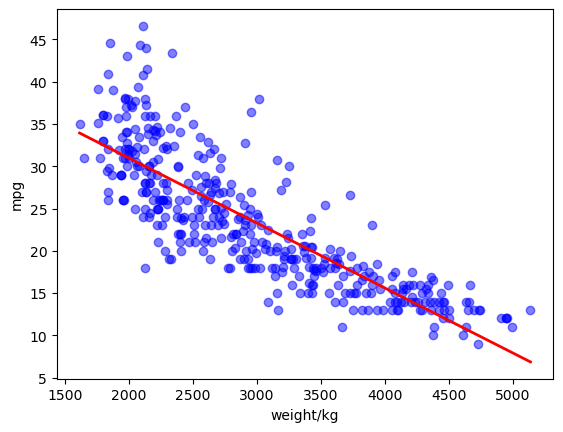

In [291]:
# plot the weight vs mpg data
plt.scatter(X_weight, y, color='blue', alpha=0.5)

# plot the linear regression line
plt.plot(prediction_space, model.predict(prediction_space),
         color='red', linewidth=2)

# name axes
plt.ylabel('mpg')
plt.xlabel('weight/kg')
plt.show()

# High Dimension Linear Regression
Slides: 31 - 32

In [292]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [294]:
reg_hd = LinearRegression()
reg_hd.fit(X_train, y_train)
y_pred = reg_hd.predict(X_test)

In [295]:
reg_hd.score(X_test, y_test)

0.7211724393728975

# Cross Validation

In [296]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [297]:
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)

In [298]:
print(cv_results)

[ 0.47495237  0.37558257  0.78393429  0.66311985 -0.675234  ]


In [299]:
np.mean(cv_results)

0.32447101767734476

# Regularised Regression

In [300]:
from sklearn.linear_model import Ridge

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

/Users/samuelspeller/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.7148473704614149

In [302]:
from sklearn.linear_model import Lasso

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lasso = Lasso(alpha=0.001, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

/Users/samuelspeller/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


0.7147220303642243

# Polynomial

In [304]:
m=100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

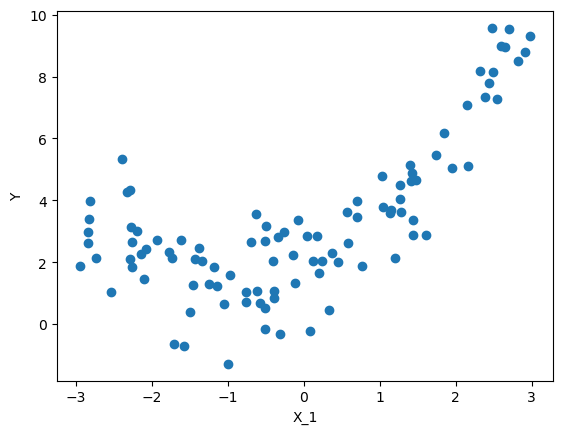

In [305]:
plt.scatter(X, y)
plt.ylabel('Y')
plt.xlabel('X_1')
plt.show()

In [306]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.33007547])

In [307]:
X_poly[0]

array([-2.33007547,  5.42925171])

In [308]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.82600883]), array([[1.01718741, 0.55131869]]))

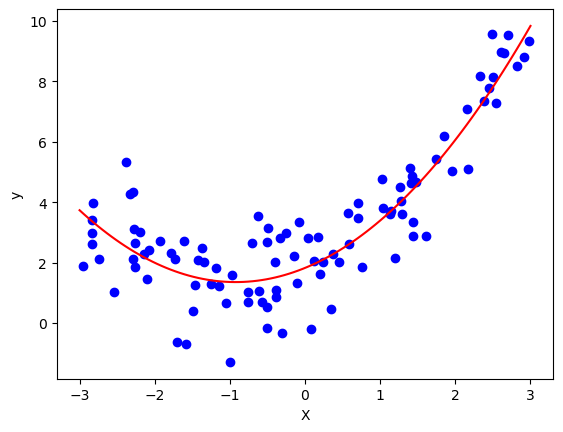

In [309]:
plt.scatter(X, y, color='blue')
X_fit = np.linspace(-3, 3, 100).reshape(-1, 1)
X_fit_poly = poly_features.transform(X_fit)
y_fit = lin_reg.predict(X_fit_poly)
plt.plot(X_fit, y_fit, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [310]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [311]:

# Importing the dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [312]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

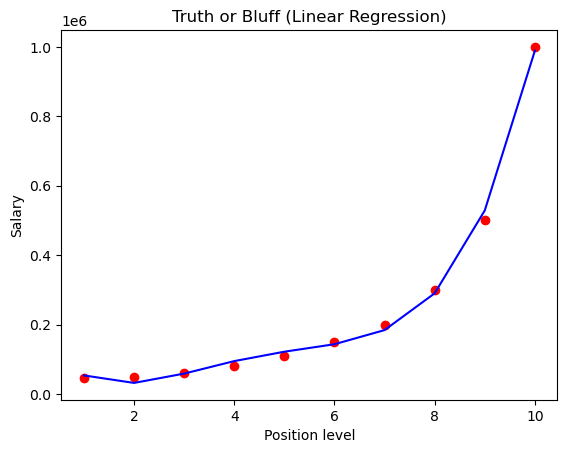

In [313]:

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()